In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement

In [9]:
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [11]:
inspector = inspect(engine)

In [12]:
inspector.get_table_names()

['measurement', 'station']

In [13]:
mcolumns = inspector.get_columns('measurement')
for column in mcolumns:
    print(column["name"])

id
station
date
prcp
tobs


In [14]:
scolumns = inspector.get_columns('station')
for column in scolumns:
    print(column["name"])

id
station
name
latitude
longitude
elevation


# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [17]:
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One year from most recent date: ", one_year)



One year from most recent date:  2016-08-23


In [18]:
# Perform a query to retrieve the data and precipitation scores

precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()
precip



[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

precip_df = pd.DataFrame(precip, columns=['date', 'prcp'])
precip_df.set_index('date', inplace=True)
precip_df.sort_index()
precip_df.head(50)


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


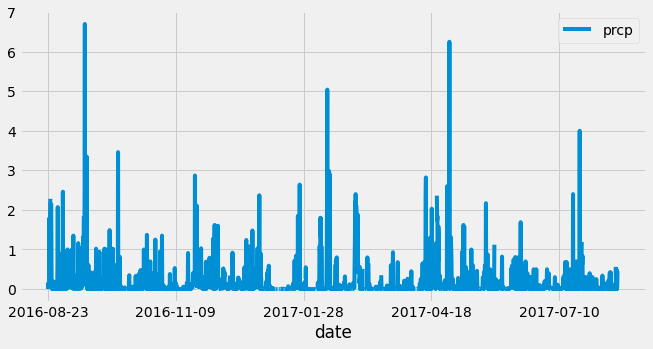

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precip_df.plot(kind="line", figsize=(10, 5))


plt.show()



In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_mean = precip_df['prcp'].mean()
precip_median = precip_df['prcp'].median()
precip_var = precip_df['prcp'].var()
precip_std = precip_df['prcp'].std()
precip_sem = precip_df['prcp'].sem()

print(f"The precipitation mean is: {precip_mean}")
print(f"The precipitation median is: {precip_median}")
print(f"The precipitation variance is: {precip_var}")
print(f"The precipitation standard deviation is: {precip_std}")
print(f"The precipitation SEM is: {precip_sem}")


The precipitation mean is: 0.17727857496288896
The precipitation median is: 0.02
The precipitation variance is: 0.21269575849618533
The precipitation standard deviation is: 0.4611895038877027
The precipitation SEM is: 0.01025879279145184


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
total_station_count = session.query(Measurement.station).group_by(Measurement.station).count()
print(f"The total number of stations is: {total_station_count}")


The total number of stations is: 9


In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
temp_max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
temp_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(f"The Lowest temperature observed is: {temp_min}")
print(f"The Highest temperature observed is: {temp_max}")
print(f"The Average temperature observed is: {temp_avg}")


The Lowest temperature observed is: [(54.0,)]
The Highest temperature observed is: [(85.0,)]
The Average temperature observed is: [(71.66378066378067,)]


In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()
station_temp



[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [27]:
#Create Dataframe for the station and observed temps for one year

station_temp_df = pd.DataFrame(station_temp, columns=['date', 'tobs'])
precip_df.sort_index()
precip_df.head(50)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


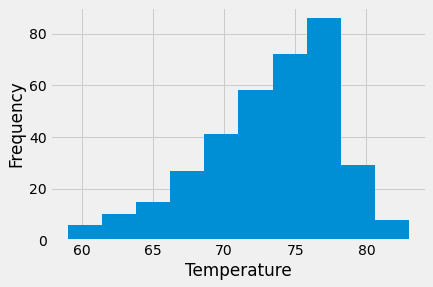

In [28]:
#Plot histogram
plt.hist(station_temp_df.tobs)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [29]:
# Close Session
session.close()